In [1]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# HIDDEN
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

## Tips

In [3]:
delays = pd.read_csv('united_summer2015.csv')
delays

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
...,...,...,...,...
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1
13824,8/31/15,2013,EWR,-2


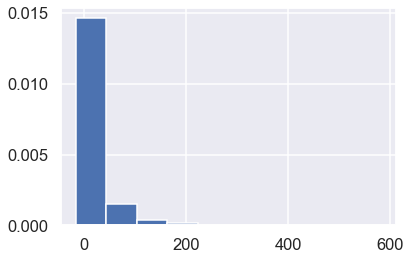

In [4]:
delays['Delay'].hist(density=True)

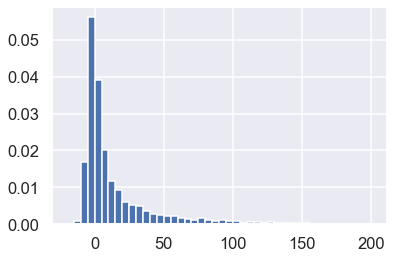

In [5]:
delays['Delay'].hist(density=True, bins=np.arange(-20, 201, 5))

In [6]:
def mse(theta, data=delays['Delay']):
    return np.mean((theta - data)**2)

mse(10)

1603.0172151898735

In [7]:
mse(15)

1561.4356600361664

In [8]:
def make_loss_df(thetas, loss_fn):
    return pd.DataFrame({
        'theta': thetas,
        loss_fn.__name__: [loss_fn(theta) for theta in thetas]
    })

In [9]:
thetas = np.arange(0, 30)
mse_vals = make_loss_df(thetas, mse)
mse_vals

,theta,mse
0,0,1836.18
1,1,1803.86
2,2,1773.55
...,...,...
27,27,1665.64
28,28,1687.32
29,29,1711.01


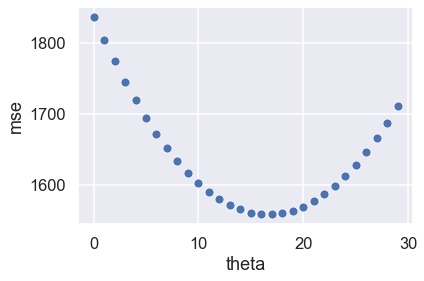

In [10]:
sns.scatterplot(x='theta', y='mse', data=mse_vals)

In [12]:
mse_vals.sort_values('mse')

,theta,mse
17,17,1558.80
16,16,1559.12
18,18,1560.49
...,...,...
2,2,1773.55
1,1,1803.86
0,0,1836.18


In [14]:
theta_hat_mse = np.mean(delays['Delay'])
(theta_hat_mse, mse(theta_hat_mse))

(16.658155515370705, 1558.6861803230322)

### MAE

In [15]:
def mae(theta, data=delays['Delay']):
    return np.mean(np.abs(theta - data))

mae(10)

20.74003616636528

In [16]:
mae_vals = make_loss_df(thetas, mae)
mae_vals

,theta,mae
0,0,19.54
1,1,19.39
2,2,19.33
...,...,...
27,27,29.19
28,28,29.80
29,29,30.43


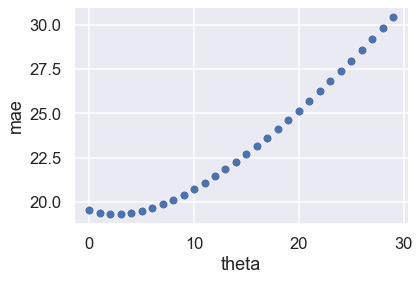

In [17]:
sns.scatterplot(x='theta', y='mae', data=mae_vals)

In [18]:
theta_hat_mae = np.median(delays['Delay'])
theta_hat_mae, mae(theta_hat_mae)

(2.0, 19.32781193490054)

In [19]:
theta_hat_mse, theta_hat_mae

(16.658155515370705, 2.0)